<a href="https://colab.research.google.com/github/debjit915/bharat_intern_ML/blob/main/house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-learn Model:
Mean Squared Error (Scikit-learn): 0.5558915986952444
129/129 [==============================] - 0s 1ms/step - loss: 0.5251

TensorFlow Model:
Mean Squared Error (TensorFlow): 0.5251378417015076
129/129 [==============================] - 0s 1ms/step


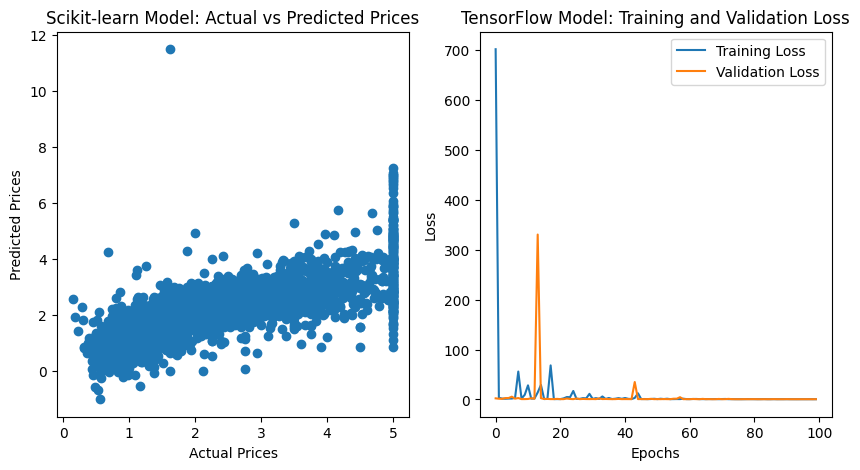

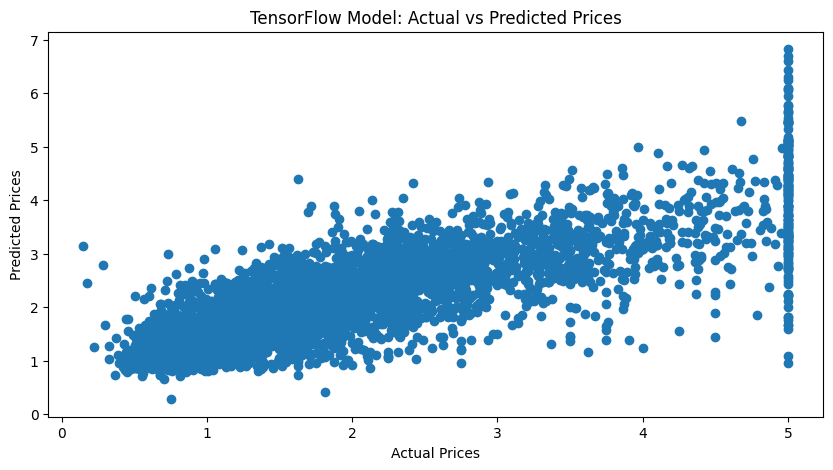

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target  # Median house value is the target variable

# Split the dataset into features and target variable
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model using scikit-learn
linear_model = LinearRegression()

# Train the scikit-learn Linear Regression model
linear_model.fit(X_train, y_train)

# Make predictions using the scikit-learn model
linear_predictions = linear_model.predict(X_test)

# Evaluate the scikit-learn model
linear_mse = mean_squared_error(y_test, linear_predictions)
print('Scikit-learn Model:')
print('Mean Squared Error (Scikit-learn):', linear_mse)

# Plot training and testing model performance graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(y_test, linear_predictions, 'o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scikit-learn Model: Actual vs Predicted Prices')

# Define the neural network model using TensorFlow
model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the TensorFlow model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the TensorFlow model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('TensorFlow Model: Training and Validation Loss')
plt.legend()

# Evaluate the TensorFlow model
tf_mse = model.evaluate(X_test, y_test)
print('\nTensorFlow Model:')
print('Mean Squared Error (TensorFlow):', tf_mse)

# Make predictions using the TensorFlow model
tf_predictions = model.predict(X_test)

# Plot actual vs predicted prices for TensorFlow model
plt.figure(figsize=(10, 5))
plt.plot(y_test, tf_predictions, 'o')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('TensorFlow Model: Actual vs Predicted Prices')
plt.show()
